# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama: Yayes Kasnanda Bintang**
- **Email: A268YBF504@devacademy.id**
- **ID Dicoding: ykbintang**

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir? 
- Produk apa yang memiliki review score tertinggi?
- Bagaimana distribusi dari customer?
- Darimana rata-rata customer berasal?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from unidecode import unidecode

from shapely.geometry import Point
import geopandas as gpd
import plotly.express as px

%matplotlib inline

## Data Wragling

### Gathering Data

In [2]:
customers_df = pd.read_csv('./data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geo_df = pd.read_csv('./data/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv('./data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_pay_df = pd.read_csv('./data/order_payments_dataset.csv')
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_rev_df = pd.read_csv('./data/order_reviews_dataset.csv')
order_rev_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('./data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_cat_df = pd.read_csv('./data/product_category_name_translation.csv')
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('./data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('./data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Menilai semua tabel

In [11]:
print('Tabel customers_df:')
print(customers_df.info(), '\n\nTabel geo_df:')
print(geo_df.info(), '\n\nTabel order_items_df')
print(order_items_df.info(), '\n\nTabel order_pay_df')
print(order_pay_df.info(), '\n\nTabel order_rev_df:')
print(order_rev_df.info(), '\n\nTabel orders_df:')
print(orders_df.info(), '\n\nTabel product_cat_df:')
print(product_cat_df.info(), '\n\nTabel products_df:')
print(products_df.info(), '\n\nTabel sellers_df:')
print(sellers_df.info())

Tabel customers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Tabel geo_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geoloc

- Tabel `order_items_df` terindikasi ada kesalahan tipe data pada kolom **shipping_limit_date**
- Tabel `order_rev_df`:

    - terindikasi ada missing value pada kolom **review_comment_title** dan **review_comment_message**
    - terindikasi ada kesalahan tipe data pada kolom **review_creation_date** dan **review_answer_timestamp**
- Tabel `orders_df`:

    - terindikasi ada missing value pada kolom **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**
    - terindikasi ada kesalahan tipe data pada kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date**
- Tabel `products_df` treindikasi ada missing value pada kolom **product_category_name**, **product_name_lenght**, **product_description_lenght**, **product_photos_qty**, **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm**

Cek tabel yang terindikasi ada missing values

In [12]:
print('Tabel Order Review:\n', order_rev_df.isna().sum())
print('\nTabel Orders:\n', orders_df.isna().sum())
print('\nTabel Products:\n', products_df.isna().sum())

Tabel Order Review:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Tabel Orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Tabel Products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Cek data duplikat semua tabel

In [13]:
print('Data duplikat tabel customers_df:', customers_df.duplicated().sum())
print('Data duplikat tabel geo_df:', geo_df.duplicated().sum())
print('Data duplikat tabel order_items_df:', order_items_df.duplicated().sum())
print('Data duplikat tabel order_pay_df:', order_pay_df.duplicated().sum())
print('Data duplikat tabel order_rev_df:', order_rev_df.duplicated().sum())
print('Data duplikat tabel orders_df:', orders_df.duplicated().sum())
print('Data duplikat tabel product_cat_df:', product_cat_df.duplicated().sum())
print('Data duplikat tabel products_df:', products_df.duplicated().sum())
print('Data duplikat tabel sellers_df:', sellers_df.duplicated().sum())

Data duplikat tabel customers_df: 0
Data duplikat tabel geo_df: 261831
Data duplikat tabel order_items_df: 0
Data duplikat tabel order_pay_df: 0
Data duplikat tabel order_rev_df: 0
Data duplikat tabel orders_df: 0
Data duplikat tabel product_cat_df: 0
Data duplikat tabel products_df: 0
Data duplikat tabel sellers_df: 0


Cek parameter statistik semua tabel

In [14]:
print('Tabel customers_df:\n', customers_df.describe())
print('\nTabel geo_df:\n', geo_df.describe())
print('\nTabel order_items_df:\n', order_items_df.describe())
print('\nTabel order_pay_df:\n', order_pay_df.describe())
print('\nTabel order_rev_df:\n', order_rev_df.describe())
print('\nTabel orders_df:\n', orders_df.describe().T)
print('\nTabel product_cat_df:\n', product_cat_df.describe())
print('\nTabel products_df:\n', products_df.describe().T)
print('\nTabel sellers_df:\n', sellers_df.describe())

Tabel customers_df:
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Tabel geo_df:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

Tabel order_items_df:
        order_item_id          

Cek data kategorikal semua tabel

In [15]:
order_pay_df.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [16]:
order_rev_df.review_score.value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [17]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### Cleaning Data

#### Tabel `geo_df`

Duplicate data

In [18]:
print(geo_df.duplicated().sum())

261831


In [19]:
geo_df.geolocation_state.value_counts().head()

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
Name: count, dtype: int64

In [20]:
geo_df[geo_df.geolocation_state == 'SP'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
216186,8750,-23.546417,-46.255469,mogi das cruzes,SP
380536,18016,-23.500407,-47.429663,sorocaba,SP
198183,8130,-23.507451,-46.370276,sao paulo,SP
342259,14890,-21.279575,-48.329418,jaboticabal,SP
176557,6825,-23.665757,-46.812028,embu das artes,SP


- Terdapat data duplikat, tetapi kita tidak akan menggunakan drop duplikat karena data termasuk ke dalam data lokasi dimana koordinat latitude dan longitude yang unik menandakan titik lokasi yang berbeda.

#### Tabel `order_items_df`

Incorrect data type

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)
order_items_df.shipping_limit_date = order_items_df.shipping_limit_date.dt.date
order_items_df.shipping_limit_date = pd.to_datetime(order_items_df.shipping_limit_date)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14


In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Tabel `order_rev_df`

##### Missing values

In [24]:
order_rev_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
order_rev_df[order_rev_df.isna().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [26]:
order_rev_df.review_comment_title.value_counts().head()

review_comment_title
Recomendo          423
recomendo          345
Bom                293
super recomendo    270
Excelente          248
Name: count, dtype: int64

In [27]:
order_rev_df.review_comment_message.value_counts().head()

review_comment_message
Muito bom    230
Bom          189
muito bom    122
bom          107
Recomendo    100
Name: count, dtype: int64

In [28]:
order_rev_df.fillna(value='No comment', inplace=True)

In [29]:
order_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


##### Incorrect data type

In [30]:
columns = ['review_creation_date', 'review_answer_timestamp']

for col in columns:
    order_rev_df[col] = pd.to_datetime(order_rev_df[col])
    order_rev_df[col] = order_rev_df[col].dt.date
    order_rev_df[col] = pd.to_datetime(order_rev_df[col])

order_rev_df.rename(columns={'review_answer_timestamp': 'review_answer_date'}, inplace=True)

order_rev_df.sample()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
87315,ec13f6c6f516c0011029751d3f25d0c1,7c5a7744669451871d2bd31dbcd8f80b,5,No comment,No comment,2018-06-22,2018-06-25


In [31]:
order_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   review_id               99224 non-null  object        
 1   order_id                99224 non-null  object        
 2   review_score            99224 non-null  int64         
 3   review_comment_title    99224 non-null  object        
 4   review_comment_message  99224 non-null  object        
 5   review_creation_date    99224 non-null  datetime64[ns]
 6   review_answer_date      99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Tabel `orders_df`

##### Missing values

In [32]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [33]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
orders_df[orders_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [35]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

- Kondisi missing value ini akan kita biarkan agar tidak berdampak pada keseluruhan data karena data termasuk kelompok minoritas berdasarkan kolom **order_status**

##### Incorrect data type

In [36]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [37]:
columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in columns:
    orders_df[col] = pd.to_datetime(orders_df[col])
    orders_df[col] = orders_df[col].dt.date
    orders_df[col] = pd.to_datetime(orders_df[col])

orders_df.rename(columns={'order_purchase_timestamp': 'order_purchase_date'}, inplace=True)

orders_df.sample()

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99220,cd5d3f244e0546f5fc8733139dafc597,4a2c271cbbafa1d8e842cb3975693180,delivered,2017-12-10,2017-12-10,2017-12-11,2017-12-15,2018-01-05


In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_date            99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Tabel `product_df`

Missing values

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [42]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
products_df.dropna(inplace=True)

In [44]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [45]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
46582,5a7346263920ecab0f88da703bbaf3b1,0fb360a422d2297dcf21d4d7b91028db,22793,rio de janeiro,RJ
4697,4c587dec0eed27895d36458365fd8246,e78d694c81a08d549fe8f3b399b29129,86600,rolandia,PR
9664,5768c4a0f086797bbe3c1a86c53d2311,8121bb77106e29a592b6dcc97841872a,89237,joinville,SC
42841,5ecc8bd7098790f73cb7b580afb1caef,ee7b648eb4a641d2f106cd5d2fdacb64,13790,sao sebastiao da grama,SP
5702,cca819156e50623e9d3762ebeee308dc,2fe9477037604b2d6f60ffc998eb0812,6458,barueri,SP


In [46]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [47]:
customers_df.customer_id.is_unique

True

In [48]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [49]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore `order_pay_df`

In [50]:
order_pay_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
100581,9cbffd61028eba6badc7fe8367674130,1,boleto,1,39.84
75304,396ecd66e534ab22f8c11be648298286,1,credit_card,3,183.25
28832,a1bec8f10a79152e439c5133f404c772,1,credit_card,1,76.66
78953,c3209eebfba86d30279573e94ae46a2b,1,boleto,1,27.39
89689,b56bcbb57a9be94114e2dfb18399193e,1,credit_card,1,123.85


In [51]:
order_pay_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [52]:
order_pay_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_sequential': ['max', 'min', 'mean', 'std'],
    'payment_installments': ['max', 'min', 'mean', 'std']
})

order_id payment_sequential                          \
              nunique                max min      mean       std   
payment_type                                                       
boleto          19784                  2   1  1.000051  0.007110   
credit_card     76505                  3   1  1.004167  0.064619   
debit_card       1528                  3   1  1.034663  0.186527   
not_defined         3                  1   1  1.000000  0.000000   
voucher          3866                 29   1  2.602424  2.550195   

             payment_installments                         
                              max min      mean      std  
payment_type                                              
boleto                          1   1  1.000000  0.00000  
credit_card                    24   0  3.507155  2.85099  
debit_card                      1   1  1.000000  0.00000  
not_defined                     1   1  1.000000  0.00000  
voucher                         1   1  1.000000  0.00000

- tipe pembayaran didominasi oleh **credit_card**
- pembayaran berurutan paling banyak dilakukan dengan dengan **voucher**
- cicilan pembayaran paling banyak dilakukan dengan **cedit_card**
- hanya 3 order dengan status tipe pembayaran **not_defined**

### Explore `orders_df`

In [53]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
81713,16ce87d063ff5f7dfe9bc57bfea8d6f5,a8950672a28d9b167bae1f274ce5b7d2,delivered,2018-05-15,2018-05-16,2018-05-17,2018-05-21,2018-06-05
87456,1a89170dbb050ebb1530d3f2c574d4dd,83118e93b969419946159bf8520873ef,delivered,2018-08-24,2018-08-24,2018-08-27,2018-08-30,2018-09-14
22975,2025b5bad835a500f8422436e24bd78f,1677712a7d16c75d46e54b6c5c9218b1,processing,2017-02-22,2017-02-22,NaT,NaT,2017-03-27
39468,3146e5198dddba5ff4a7843339a58226,646aa9a51168830e3f82112612b785f8,delivered,2018-07-01,2018-07-02,2018-07-09,2018-07-13,2018-07-26
70565,04814d2760b610101075888832621881,25631315ece1d1541fbede2ef9b2b379,delivered,2018-04-30,2018-04-30,2018-05-02,2018-05-06,2018-06-01


In [54]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

In [55]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
32216,30f0c1cbcfb334c331b788655f973cae,756b44d886451d4dbfa82dfe67ecf0ec,delivered,2017-10-15,2017-10-15,2017-10-17,2017-10-21,2017-11-01,4.0
81801,f2ff1f78a5733d7178e393c543100e0a,6571517c9efc678ea3a386e13bb33481,delivered,2018-08-07,2018-08-07,2018-08-08,2018-08-13,2018-08-23,5.0
55345,c3e200f75866c36eca7ac2845f819bfb,09eabd495689fce0ed536d807c1cdc0f,delivered,2018-03-14,2018-03-14,2018-03-15,2018-03-20,2018-04-02,5.0
1496,f1d572fdda4a03235f86ebb75b8e536c,20c428d35e8e49aad5e519babee5ff48,delivered,2018-02-09,2018-02-09,2018-02-14,2018-02-20,2018-03-12,6.0
98730,edc5c94770796f4212d272830dd17840,9402dbb303afb512fea5c46c22523b95,delivered,2018-01-12,2018-01-16,2018-01-17,2018-01-20,2018-01-31,3.0


In [56]:
orders_df.describe()

,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99281,97658,96476,99441,96475.000000
mean,2017-12-30 17:26:56.616888320,2017-12-31 05:20:33.553248256,2018-01-04 06:13:53.848737536,2018-01-13 19:24:32.449106432,2018-01-24 03:08:37.730111232,9.282778
min,2016-09-04 00:00:00,2016-09-15 00:00:00,2016-10-08 00:00:00,2016-10-11 00:00:00,2016-09-30 00:00:00,-16.000000
25%,2017-09-12 00:00:00,2017-09-12 00:00:00,2017-09-15 00:00:00,2017-09-25 00:00:00,2017-10-03 00:00:00,4.000000
50%,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-24 00:00:00,2018-02-02 00:00:00,2018-02-15 00:00:00,7.000000
75%,2018-05-04 00:00:00,2018-05-04 00:00:00,2018-05-08 00:00:00,2018-05-15 00:00:00,2018-05-25 00:00:00,12.000000
max,2018-10-17 00:00:00,2018-09-03 00:00:00,2018-09-11 00:00:00,2018-10-17 00:00:00,2018-11-12 00:00:00,205.000000
std,NaN,NaN,NaN,NaN,NaN,8.777229


In [57]:
orders_df[orders_df.delivery_time < 1].sort_values(by='delivery_time')

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
34939,c1e2bf2b7dd3309f2f5356c6b63968fa,e37d47e7eec62f08dc5deecc7d5532d6,delivered,2017-02-10,2017-02-10,2017-03-02,2017-02-14,2017-03-15,-16.0
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30,2017-07-30,2017-08-09,2017-08-01,2017-08-18,-8.0
45302,29941903985f944b0ffc49c479c1547d,b56ee98181afc3948a758d73a08423de,delivered,2017-05-29,2017-05-29,2017-06-09,2017-06-02,2017-06-23,-7.0
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20,2017-07-22,2017-08-01,2017-07-26,2017-08-11,-6.0
71227,19feb5627c41ea1b36a8e50a469b3644,b8097c8f0c1f58ab56a53812a446a898,delivered,2016-10-07,2016-10-07,2016-10-26,2016-10-20,2016-12-01,-6.0
...,...,...,...,...,...,...,...,...,...
98391,576adb3745bf32808dc8207fe39f8542,f6ec8e3d19c8c405c7839b0389c5bb7b,delivered,2017-06-17,2017-06-17,2017-06-19,2017-06-19,2017-06-30,0.0
98594,099acf2a98eba9bab889af025be407b7,7c2a55810a39cd8421f6fd48f88210ac,delivered,2017-08-15,2017-08-16,2017-09-06,2017-09-06,2017-10-18,0.0
98694,d613e5d350507dc43eed8de7ccffdf6a,4f06c14beb9f0bd010c8386b2bfa21ec,delivered,2018-07-23,2018-07-23,2018-08-09,2018-08-09,2018-08-13,0.0
98796,2b5bd09c3c5b318e1b7293015fdfb481,9ca79e35d1014c21159bad5aa971820f,delivered,2018-04-06,2018-04-06,2018-04-07,2018-04-07,2018-04-23,0.0


- disini terdapat anomali data dimana **delivery_time** sampai minus sebanyak 325 baris, kita akan menggunakan filtering

In [58]:
orders_df = orders_df[~(orders_df.delivery_time < 1)]

In [59]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99116,99116,99116,99116,98956,97333,96151,99116,96150.000000
unique,99116,99116,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96153,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 19:22:14.726986240,2017-12-31 07:15:46.311492096,2018-01-04 07:56:29.325305856,2018-01-13 21:56:01.500140544,2018-01-24 05:24:40.883005952,9.314956
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-09-15 00:00:00,2016-10-08 00:00:00,2016-10-11 00:00:00,2016-09-30 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-12 00:00:00,2017-09-13 00:00:00,2017-09-15 00:00:00,2017-09-25 00:00:00,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-24 00:00:00,2018-02-02 00:00:00,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-05 00:00:00,2018-05-08 00:00:00,2018-05-16 00:00:00,2018-05-28 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 00:00:00,2018-09-03 00:00:00,2018-09-11 00:00:00,2018-10-17 00:00:00,2018-11-12 00:00:00,205.000000


<Axes: >

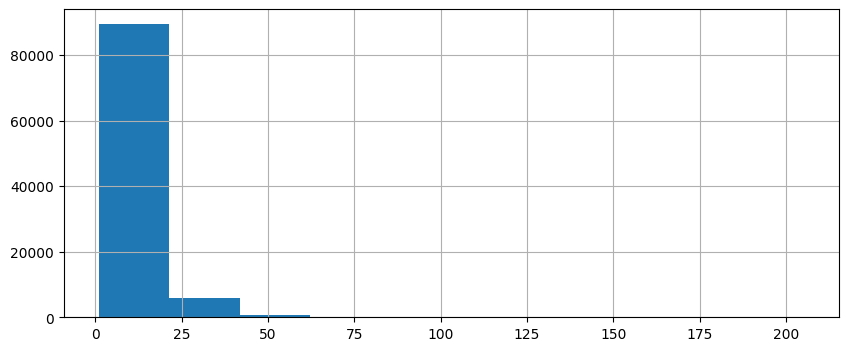

In [60]:
orders_df.delivery_time.hist(figsize=(10, 4))

- waktu pengiriman mayoritas kurang dari 25 hari dengan rata-rata pengiriman adalah 9 hari dan paling lama bisa mencapai lebih dari 200 hari

In [61]:
customers_id_in_orders_df = orders_df.customer_id.to_list()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: 'Active' if x in customers_id_in_orders_df else 'Non Active')
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
5729,98ef9188ce9357bd77f60150a935c7fb,c6f70f6262d971489361b0d4fb0936ed,12460,campos do jordao,SP,Active
74462,d5801b1facc46f4f2ed5c356eb755e5d,b4de198e39879b4f55679df93beb1e8c,37620,munhoz,MG,Active
654,064e67871d53f3fbfd15385a0ca3a54b,4dad028c287475ff2421bdb9c9b5dd2f,91751,porto alegre,RS,Active
96724,94316b10a38127d6f2291d061879acee,4facc2e6fbc2bffab2fea92d2b4aa7e4,91450,porto alegre,RS,Active
71803,aafb42297a445d9bcc0b01058f829da2,d8dc3e83600173cd56277eeebfa83b05,26520,nilopolis,RJ,Active


In [62]:
customers_df.groupby('status').customer_id.nunique()

status
Active        99116
Non Active      325
Name: customer_id, dtype: int64

- tardapat 325 customer dengan status **Non Active** karena belum pernah melakukan pemesanan 

In [63]:
customers_df[customers_df.status == 'Non Active']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,Non Active
429,6e99b4a37b2d5aa40cb85bdfcf9dc0eb,2a914bdfae6c0cc612a51e479acc0128,11065,santos,SP,Non Active
438,7d1dd3c96c21c803f7a1a32aa8d9feb9,729e9d3fa93475add3ea25424e83e1ad,2559,sao paulo,SP,Non Active
531,ad21255ff9650ff11d50513eff3eed15,005226be8d5b972d0f72b4e8a79f322b,22280,rio de janeiro,RJ,Non Active
559,079da973ecd0fb654da4ffdb946c9ea1,527c6fbbe85cdf78ff1645e0a71e266f,1455,sao paulo,SP,Non Active
...,...,...,...,...,...,...
98074,d55de705b0cacd7818caa64cf65ed2ec,2a0fc51f813646ee8afdf0abf76eaca9,4152,sao paulo,SP,Non Active
98114,e37d47e7eec62f08dc5deecc7d5532d6,a6c7bbea6e469cbc9a4cd1fe3c7aff12,30310,belo horizonte,MG,Non Active
98323,c97a6229e71d7085feb5a37bdf2a3527,9d9f5c03dc7ff5eb5931407d9882a3a5,9720,sao bernardo do campo,SP,Non Active
98909,7c2a55810a39cd8421f6fd48f88210ac,5b1ccb22b017dc7b926bc2de7a6ae857,79420,camapua,MS,Non Active


### Explore `orders_df` & `customers_df`

Menggabungkan data `orders_df` dan `customers_df`

In [64]:
display(orders_df.head(2), customers_df.head(2))

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active


In [65]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
display(orders_customers_df.shape, orders_customers_df.head())

(99116, 14)

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,10.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [66]:
orders_customers_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15400
rio de janeiro            6871
belo horizonte            2765
brasilia                  2131
curitiba                  1516
campinas                  1440
porto alegre              1375
salvador                  1245
guarulhos                 1181
sao bernardo do campo      927
Name: order_id, dtype: int64

In [67]:
orders_customers_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41481
RJ    12831
MG    11618
RS     5459
PR     5038
SC     3635
BA     3379
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [68]:
orders_customers_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96153
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore `order_pay_df` & `order_rev_df`

Menggabungkan data `order_pay_df` dan `order_rev_df`

In [69]:
display(order_pay_df.head(2), order_rev_df.head(2))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No comment,No comment,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No comment,No comment,2018-03-10,2018-03-11


In [70]:
order_payrev_df = pd.merge(
    left=order_pay_df,
    right=order_rev_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
display(order_payrev_df.shape, order_payrev_df.head())

(104477, 11)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No comment,No comment,2018-06-30,2018-07-03
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No comment,Aprovada,2017-12-19,2017-12-22
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No comment,No comment,2017-12-21,2017-12-21
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No comment,No comment,2017-12-21,2017-12-22


In [71]:
order_payrev_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [72]:
order_payrev_df.sort_values(by='payment_value', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No comment,No comment,2017-06-06,2017-06-07
...,...,...,...,...,...,...,...,...,...,...,...
101330,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,No comment,No comment,2017-06-08,2017-06-10
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18
44001,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0,No comment,No comment,2017-11-09,2018-02-14


In [73]:
order_payrev_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': ['max', 'min', 'mean', 'std']
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  144.986413  213.233559
credit_card     76505      13664.08   0.01  163.140977  221.751964
debit_card       1528       4445.50  13.38  142.396569  245.289434
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.499655  115.264832

- nilai pembayaran paling tinggi dilakukan dengan tipe pembayaran **credit_card**
- rata-rata nilai pembayaran paling tinggi sudah sesuai dengan jumlah order dan nilai pembayaran
- terdapat 3 order dengan status **not_defined**

### Explore `order_items_df` & `sellers_df`

Menggabungkan tabel `order_items` dan `sellers_df`

In [74]:
display(order_items_df.head(2), sellers_df.head(2))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [75]:
seller_items_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
display(seller_items_df.shape, seller_items_df.head())

(112650, 10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,87900,loanda,PR


In [76]:
seller_items_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

- seller paling banyak bersal dari kota **sao paulo**

In [77]:
seller_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650,112650
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,sao paulo,SP
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN,27983,80342
mean,NaN,1.197834,NaN,NaN,2018-01-07 02:28:41.480692480,120.653739,19.990320,24439.170431,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:00:00,0.850000,0.000000,1001.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 00:00:00,39.900000,13.080000,6429.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 00:00:00,74.990000,16.260000,13568.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 00:00:00,134.900000,21.150000,27930.000000,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 00:00:00,6735.000000,409.680000,99730.000000,NaN,NaN


### Explore `products_df` & `product_cat_df`

Menggabungkan `products_df` dan `product_cat_df`

In [78]:
display(products_df.head(2), product_cat_df.head(2))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [79]:
products_df = pd.merge(
    left=products_df,
    right=product_cat_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
display(products_df.shape, products_df.head())

(32340, 10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [80]:
products_df.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False).head()

product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: product_id, dtype: int64

In [81]:
products_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head()

product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: product_id, dtype: int64

### Explore `geo_df`

In [82]:
geo_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
918592,88845,-28.600126,-49.312931,cocal do sul,SC
181964,7083,-23.436892,-46.552005,guarulhos,SP
965173,95098,-29.199954,-51.181413,caxias do sul,RS
265314,11900,-24.496563,-47.852614,registro,SP
998008,99500,-28.280982,-52.786667,carazinho,RS


In [83]:
geo_df.geolocation_state.value_counts()

geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

In [84]:
geo_df.geolocation_city.value_counts()

geolocation_city
sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
                   ...  
sao bras               1
são brás               1
ibitiranga             1
quixabá                1
maceia³                1
Name: count, Length: 8011, dtype: int64

- pada kolom **geolocation_city** dengan string non-ASCII, kita akan menggunakan library unidecode

In [85]:
geo_df['geolocation_city'] = geo_df['geolocation_city'].apply(lambda x: unidecode(x))

In [86]:
geo_df.geolocation_city.value_counts()

geolocation_city
sao paulo               160718
rio de janeiro           62151
belo horizonte           27805
curitiba                 16593
porto alegre             13521
                         ...  
santa eudoxia                1
agua vermelha                1
cardeal                      1
bom fim do bom jesus         1
guarulhos-sp                 1
Name: count, Length: 5969, dtype: int64

### Explore `customers_df` & `geo_df`

In [87]:
display(customers_df.head(2), geo_df.head(2))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [88]:
geo_df_unique = geo_df.groupby(by='geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first',
    'geolocation_state': 'first'
}).reset_index()
display(geo_df_unique.shape, geo_df_unique.head())

(19015, 5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


In [89]:
custgeo_df = pd.merge(
    left=customers_df,
    right=geo_df_unique,
    how='left',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
display(custgeo_df.shape, custgeo_df.head())

(99441, 11)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409.0,-20.498489,-47.396929,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,9790.0,-23.727992,-46.542848,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,1151.0,-23.531642,-46.656289,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,8775.0,-23.499702,-46.185233,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,13056.0,-22.975100,-47.142925,campinas,SP


In [90]:
custgeo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99441 non-null  object 
 1   customer_unique_id           99441 non-null  object 
 2   customer_zip_code_prefix     99441 non-null  int64  
 3   customer_city                99441 non-null  object 
 4   customer_state               99441 non-null  object 
 5   status                       99441 non-null  object 
 6   geolocation_zip_code_prefix  99163 non-null  float64
 7   geolocation_lat              99163 non-null  float64
 8   geolocation_lng              99163 non-null  float64
 9   geolocation_city             99163 non-null  object 
 10  geolocation_state            99163 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.3+ MB


In [91]:
custgeo_df = custgeo_df[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng']]
custgeo_df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,-22.975100,-47.142925


In [92]:
custgeo_df.isna().sum()

customer_id                   0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
geolocation_lat             278
geolocation_lng             278
dtype: int64

In [93]:
custgeo_df[custgeo_df.isna().any(axis=1)]

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
354,ecb1725b26e8b8c458181455dfa434ea,72300,brasilia,DF,NaN,NaN
382,bcf86029aeed4ed8bac0e16eb14c22f5,11547,cubatao,SP,NaN,NaN
877,f4302056f0c58570522590f8181de2c7,64605,picos,PI,NaN,NaN
1218,03bbe0ce5c28e05f22917607db798818,72465,brasilia,DF,NaN,NaN
1272,ad4950aded55c2ea376be59506456d68,7729,caieiras,SP,NaN,NaN
...,...,...,...,...,...,...
97467,cf818420383856a129134f5f8343f7b8,72338,brasilia,DF,NaN,NaN
97780,67f3e907dce402e696b15f9308ff22ed,68629,paragominas,PA,NaN,NaN
98140,f792e419335df11d82c32efcfb09c51b,28530,sao sebastiao do paraiba,RJ,NaN,NaN
98878,78a11bb1fa72f556996b9a5b9bcd0629,55863,siriji,PE,NaN,NaN


In [94]:
custgeo_df.dropna(inplace=True)

In [95]:
custgeo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99163 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99163 non-null  object 
 1   customer_zip_code_prefix  99163 non-null  int64  
 2   customer_city             99163 non-null  object 
 3   customer_state            99163 non-null  object 
 4   geolocation_lat           99163 non-null  float64
 5   geolocation_lng           99163 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.3+ MB


In [96]:
custgeo_df['coords'] = list(zip(custgeo_df['geolocation_lat'], custgeo_df['geolocation_lng']))
custgeo_df['coords'] = custgeo_df['coords'].apply(Point)
custgeo_df = gpd.GeoDataFrame(custgeo_df, geometry='coords')
display(type(custgeo_df), custgeo_df.head(2))

geopandas.geodataframe.GeoDataFrame

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,coords
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.498489,-47.396929,POINT (-20.49849 -47.39693)
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,-23.727992,-46.542848,POINT (-23.72799 -46.54285)


- dataframe geopandas ini akan kita gunakan dalam visualisasi persebaran customer

### Explore `products_df` & `seller_items_df`

Menggabungkan `products_df` dan `seller_items_df`

In [97]:
display(products_df.head(2), seller_items_df.head(2))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.9,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,3471,sao paulo,SP


In [98]:
sellers_df = pd.merge(
    left=products_df,
    right=seller_items_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
display(sellers_df.shape, sellers_df.head())

(111046, 19)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17,37.90,8.29,4461,sao paulo,SP


In [99]:
sellers_df.sort_values(by='price', ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16,6735.00,194.31,3635,sao paulo,SP
72948,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02,6729.00,193.21,86026,londrina,PR
48843,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15,6499.00,227.66,74210,goiania,GO
70869,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18,4799.00,151.34,13480,limeira,SP
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55172,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,6,2709af9587499e95e803a6498a5a56e9,2017-07-21,1.20,7.89,3813,sao paulo,SP
55176,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,10,2709af9587499e95e803a6498a5a56e9,2017-07-21,1.20,7.89,3813,sao paulo,SP
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07,0.85,22.30,38950,ibia,MG
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02,0.85,18.23,38950,ibia,MG


In [100]:
sellers_df.groupby('product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['max', 'min', 'mean', 'std']
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id    price                      \
                               nunique      max     min        mean   
product_category_name_english                                         
bed_bath_table                    9417  1999.98    6.99   93.296327   
health_beauty                     8836  3124.00    1.20  130.163531   
sports_leisure                    7720  4059.00    4.50  114.344285   
computers_accessories             6689  3699.99    3.90  116.513903   
furniture_decor                   6449  1899.00    4.90   87.564494   
...                                ...      ...     ...         ...   
arts_and_craftmanship               23   289.49    9.80   75.583750   
la_cuisine                          13   389.00   24.00  146.785000   
cds_dvds_musicals                   12    65.00   45.00   52.142857   
fashion_childrens_clothes            8   110.00   39.99   71.231250   
security_and_services                2   183.29  100.00  141.645000   

                                           
                                      std  
product_category_name_english              
bed_bath_table                  82.128028  
health_beauty                  179.499147  
sports_leisure                 162.471635  
computers_accessories          169.974919  
furniture_decor                 88.832037  
...                                   ...  
arts_and_craftmanship           73.997815  
la_cuisine                      79.373941  
cds_dvds_musicals                9.944903  
fashion_childrens_clothes       31.831886  
security_and_services           58.894924  

[71 rows x 5 columns]

- produk dengan order paling tinggi adalah kategori **bed_bath_table**

### Explore `orders_customers_df` & `order_payrev_df`

Menggabungkan tabel `orders_customers_df` dan `order_payrev_df`

In [101]:
display(orders_customers_df.head(2), order_payrev_df.head(2))

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No comment,No comment,2018-06-30,2018-07-03


In [102]:
customers_df = pd.merge(
    left=orders_customers_df,
    right=order_payrev_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
display(customers_df.shape, customers_df.head())

(104143, 24)

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No comment,No comment,2018-08-18,2018-08-22


In [103]:
customers_df.payment_type.value_counts()

payment_type
credit_card    76941
boleto         19847
voucher         5818
debit_card      1533
not_defined        3
Name: count, dtype: int64

In [104]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104143 entries, 0 to 104142
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104143 non-null  object        
 1   customer_id                    104143 non-null  object        
 2   order_status                   104143 non-null  object        
 3   order_purchase_date            104143 non-null  datetime64[ns]
 4   order_approved_at              103967 non-null  datetime64[ns]
 5   order_delivered_carrier_date   102245 non-null  datetime64[ns]
 6   order_delivered_customer_date  100989 non-null  datetime64[ns]
 7   order_estimated_delivery_date  104143 non-null  datetime64[ns]
 8   delivery_time                  100988 non-null  float64       
 9   customer_unique_id             104143 non-null  object        
 10  customer_zip_code_prefix       104143 non-null  int64         
 11  

In [105]:
print(customers_df.duplicated().sum())

0


In [106]:
customers_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_date                 0
order_approved_at                 176
order_delivered_carrier_date     1898
order_delivered_customer_date    3154
order_estimated_delivery_date       0
delivery_time                    3155
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
status                              0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_id                         798
review_score                      798
review_comment_title              798
review_comment_message            798
review_creation_date              798
review_answer_date                798
dtype: int64

In [107]:
customers_df[customers_df.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09,NaN,36edbb3fb164b1f16485364b6fb04c73,...,1.0,credit_card,1.0,65.95,e07549ef5311abcc92ba1784b093fb56,2.0,No comment,fiquei triste por n ter me atendido.,2017-05-13,2017-05-13
19,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02,2018-01-02,2018-01-03,2018-01-20,2018-02-06,17.0,6e26bbeaa107ec34112c64e1ee31c0f5,...,1.0,credit_card,10.0,1376.45,NaN,NaN,NaN,NaN,NaT,NaT
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05,2018-06-05,NaT,2018-06-28,NaN,08fb46d35bb3ab4037202c23592d1259,...,1.0,boleto,1.0,22.36,5853e27c64b89e222c5e4edf78bec3d4,1.0,No comment,No comment,2018-07-01,2018-07-11
110,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21,NaN,c7f8d7b1fffc946d7069574f74c39f4e,...,1.0,boleto,1.0,50.35,c4b17a374b71539eb360fe5baaa9a10e,3.0,bolo fake,"Gostei do produto, porem fiquei preocupada não...",2018-08-25,2018-08-29
134,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03,NaN,9f269af9c49244f6ba4a46985a3cfc2e,...,1.0,credit_card,2.0,138.28,8079a046b23b88c4cea485cfbd8aec39,5.0,No comment,No comment,2017-10-05,2017-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103979,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,NaT,NaT,NaT,2018-10-01,NaN,e90598185d2427a35e32ef241a5c04aa,...,1.0,voucher,1.0,63.89,16d3db296c46b4411dfc5f8bde882e6d,5.0,No comment,No comment,2018-07-24,2018-07-25
104010,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09,NaT,NaT,2018-02-06,NaN,965191786b70912f793e4a777fd623cd,...,1.0,boleto,1.0,144.56,f1f9860e77fbdbd7cfcfd9a94e0cf2ef,1.0,No comment,"Atendimento horrível, fiquei esperando o produ...",2018-02-10,2018-02-10
104047,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,NaT,NaT,NaT,2018-09-27,NaN,d05c44a138277ad325d915c6b7ccbcdf,...,1.0,voucher,1.0,107.13,047fd109ced39e02296f6aeb74f6a6f1,4.0,No comment,No comment,2018-07-31,2018-08-02
104048,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15,NaN,e72a90a2b29fe1a8795b284aaaa3246f,...,1.0,credit_card,2.0,195.91,41b9de18e0dd1e085e3c402d1c9b87d0,1.0,No comment,Fiz a compra do produto para presentear uma pe...,2017-09-20,2017-09-20


In [108]:
customers_df.dropna(inplace=True)
customers_df.shape

(100300, 24)

In [109]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100300 entries, 0 to 104142
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100300 non-null  object        
 1   customer_id                    100300 non-null  object        
 2   order_status                   100300 non-null  object        
 3   order_purchase_date            100300 non-null  datetime64[ns]
 4   order_approved_at              100300 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100300 non-null  datetime64[ns]
 6   order_delivered_customer_date  100300 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100300 non-null  datetime64[ns]
 8   delivery_time                  100300 non-null  float64       
 9   customer_unique_id             100300 non-null  object        
 10  customer_zip_code_prefix       100300 non-null  int64         
 11  custo

### Explore all data

Menggabungkan seluruh tabel yang diperlukan

In [110]:
display(customers_df.head(2), sellers_df.head(2))

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06,248.00,17.99,2955,sao paulo,SP


In [111]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
display(all_data.shape, all_data.head())

(114207, 42)

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13,159.90,19.22,14840.0,guariba,SP


In [112]:
all_data.payment_type.value_counts()

payment_type
credit_card    84268
boleto         22190
voucher         6101
debit_card      1648
Name: count, dtype: int64

In [113]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114207 entries, 0 to 114206
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114207 non-null  object        
 1   customer_id                    114207 non-null  object        
 2   order_status                   114207 non-null  object        
 3   order_purchase_date            114207 non-null  datetime64[ns]
 4   order_approved_at              114207 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114207 non-null  datetime64[ns]
 6   order_delivered_customer_date  114207 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114207 non-null  datetime64[ns]
 8   delivery_time                  114207 non-null  float64       
 9   customer_unique_id             114207 non-null  object        
 10  customer_zip_code_prefix       114207 non-null  int64         
 11  

In [114]:
print(all_data.duplicated().sum())

0


In [115]:
all_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_date                 0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivery_time                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
status                              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creation_date                0
review_answer_date                  0
product_id                       1404
product_category_name            1404
product_name

In [116]:
all_data[all_data.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
125,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27,2018-01-27,2018-02-03,2018-02-09,2018-02-26,6.0,34c58672601f2c6d29db7efd1f6bf958,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
213,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13,2017-09-13,2017-09-14,2017-09-21,2017-09-25,7.0,5cbf29b2dcf212a6a5d864b887238c72,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
266,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22,2017-04-22,2017-04-24,2017-05-02,2017-05-11,8.0,1268b060098ed3f22c2e7c34cc72a1a8,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
307,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08,2018-02-08,2018-02-09,2018-02-19,2018-02-22,10.0,f5cb81f98962f7504bef1e75579b6dff,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
377,6f841dde94727854eaff3f66432c80ea,a9c9532060c9d245f06526c633d2dfba,delivered,2018-01-02,2018-01-02,2018-01-03,2018-01-27,2018-02-05,24.0,5f38cc36e507c4d880489be38964af19,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113760,020f8f4df303ae8aa39b806b766d2681,d588273738545bc6a0d30971bf72e938,delivered,2017-12-27,2017-12-27,2018-01-04,2018-01-09,2018-01-23,5.0,e883ca09ca9171b6a644ddb4a970ad27,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
113775,1a10e938a1c7d8e5eecc3380f71ca76b,8a81607347c25d881d995d94de6ad824,delivered,2018-07-25,2018-07-26,2018-07-27,2018-08-01,2018-08-10,5.0,75fe53e03a8a9797acb680ce8710da8b,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
113946,e33865519137f5737444109ae8438633,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-05-28,2018-05-29,2018-05-30,2018-06-01,2018-06-20,2.0,82ffeb20040f58e6c008e4402fa6f992,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
113953,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02,2017-09-05,2017-09-14,2017-09-15,2017-09-19,1.0,1d627d8a6e1e33ea8eeeb7a17d998660,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [117]:
all_data.dropna(inplace=True)
all_data.shape

(112780, 42)

In [118]:
all_data.groupby(by=['customer_city', 'product_category_name_english']).agg({
    'price': 'sum',
    'freight_value': 'sum'
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[24788 rows x 2 columns]

In [119]:
all_data.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'price': 'sum',
    'freight_value': 'sum'
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  4920.89         921.06

[1345 rows x 2 columns]

In [120]:
all_data.groupby(by='customer_state').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).sort_values(by='payment_value', ascending=False)

,order_id,payment_value
customer_state,,
SP,39458,7273131.03
RJ,12014,2626646.31
MG,11099,2241518.96
RS,5239,1090817.20
PR,4825,1021757.77
BA,3187,754593.37
SC,3463,748751.35
GO,1900,439146.57
DF,2040,418930.05


- wilayah **SP** mendominasi jumlah order dan jumlah pembayaran

In [121]:
all_data.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'review_score': ['max', 'min', 'mean']
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id review_score               
                               nunique          max  min      mean
product_category_name_english                                     
bed_bath_table                    9142          5.0  1.0  3.916903
health_beauty                     8574          5.0  1.0  4.187815
sports_leisure                    7452          5.0  1.0  4.163160
computers_accessories             6479          5.0  1.0  3.987856
furniture_decor                   6216          5.0  1.0  3.960724
...                                ...          ...  ...       ...
home_comfort_2                      23          5.0  1.0  3.642857
la_cuisine                          12          5.0  1.0  4.133333
cds_dvds_musicals                   12          5.0  3.0  4.642857
fashion_childrens_clothes            7          5.0  5.0  5.000000
security_and_services                2          4.0  1.0  2.500000

[71 rows x 4 columns]

- untuk kategori **bed_bath_table** dengan jumlah order paling banyak ternyata mendapat rata-rata review score **3,91**

### Convert all_data to csv

In [122]:
# all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### 1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa buan terakhir?

In [123]:
all_data.sample(5)

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
35050,b570dd6ed360911428867a6962dee65b,1ab6843063af57afe30595a3444467cc,delivered,2018-02-07,2018-02-07,2018-02-09,2018-02-22,2018-03-09,13.0,48aefd0f420c5907ed4b2e36d0076441,...,12.0,computers_accessories,1.0,f457c46070d02cadd8a68551231220dd,2018-02-13,69.90,16.93,87047.0,maringa,PR
2345,dc0d27ec49c399d19c810f94cd9d322c,636fd957f57d4c30891ea36b788d1a98,delivered,2017-10-18,2017-10-18,2017-10-26,2017-10-27,2017-11-06,1.0,e428db1e8a000b274f1e4e5189e9150b,...,83.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-10-30,146.99,35.19,8577.0,itaquaquecetuba,SP
45432,0a0d25405f3880fbd46619f0852c250d,58fb5805fb543260da75a8219ce4a285,delivered,2018-07-02,2018-07-02,2018-07-06,2018-07-10,2018-07-24,4.0,89d60969a774d9ce6f453932d1bcddc9,...,30.0,stationery,1.0,3d871de0142ce09b7081e2b9d1733cb1,2018-07-08,39.00,13.35,13232.0,campo limpo paulista,SP
95908,bab7eb00c955b769472b2d3c20848026,3e3c0b3b23d15050ebec59ec39b3b597,delivered,2017-05-30,2017-05-31,2017-06-01,2017-06-07,2017-06-22,6.0,cfbc95a8f5d5021cc8fb23e4bc873502,...,30.0,bed_bath_table,1.0,0c8380b62e38e8a1e6adbeba7eb9688c,2017-06-06,59.90,14.15,37410.0,tres coracoes,MG
35873,22fe0bf39d80f86f5f4a106875e9adf9,9ca8d3e162050ac6598654057255a86c,delivered,2018-03-02,2018-03-03,2018-03-06,2018-03-16,2018-03-14,10.0,a2cb67b24e7062f1163616db07c065fe,...,15.0,health_beauty,1.0,4e922959ae960d389249c378d1c939f5,2018-03-08,99.00,10.11,12327.0,jacarei,SP


In [124]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_date,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,10.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,2.0


In [125]:
monthly_order_df = all_data.resample(rule='ME', on='order_purchase_date').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
monthly_order_df.index = monthly_order_df.index.strftime('%B %Y')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    'order_id': 'order_count',
    'price': 'revenue'
}, inplace=True)
monthly_order_df

,order_purchase_date,order_count,revenue
0,October 2016,254,40373.19
1,November 2016,0,0.00
2,December 2016,1,10.90
3,January 2017,722,115469.27
4,February 2017,1577,233750.11
5,March 2017,2473,369484.05
6,April 2017,2227,349499.61
7,May 2017,3434,515583.11
8,June 2017,3042,429710.65
9,July 2017,3764,505034.72


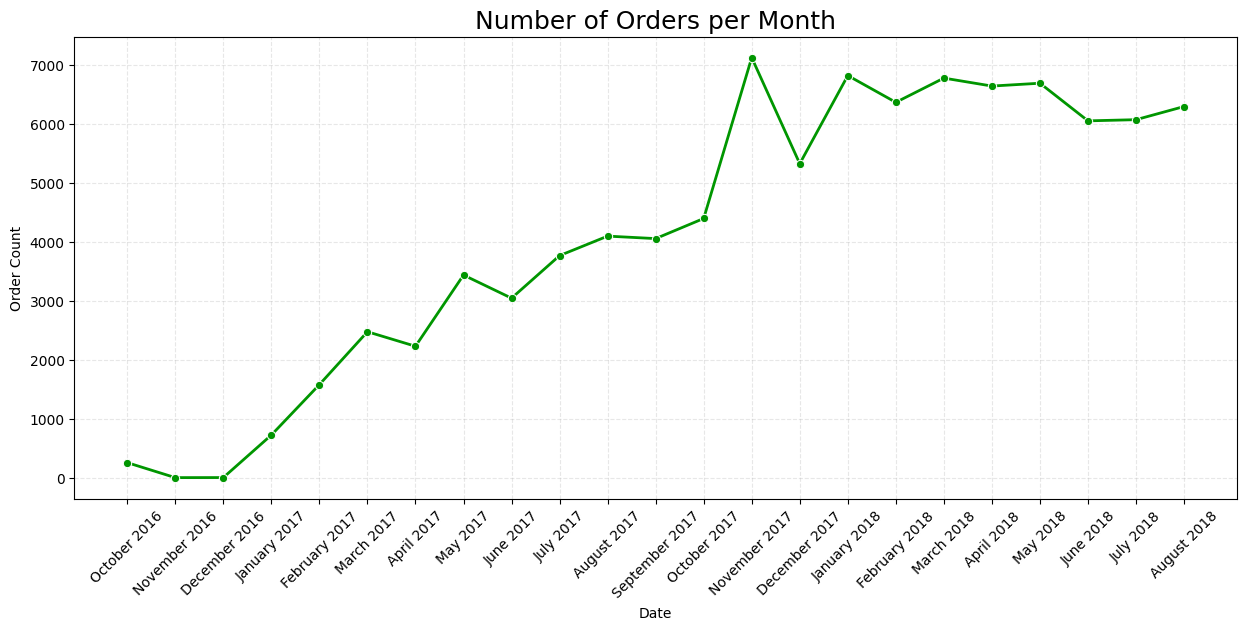

In [126]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=monthly_order_df,
    x='order_purchase_date',
    y='order_count',
    marker='o',
    linewidth=2,
    color='#009600'
)

plt.title('Number of Orders per Month', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

- dapat dilihat pada grafik bahwa jumlah order terbanyak terjadi pada bulan November 2017, lalu terjadi penurunan jumlah order pada bulan Desember 2017 tetapi kembali stabil pada bulan Januari 2018 dan setelahnya.

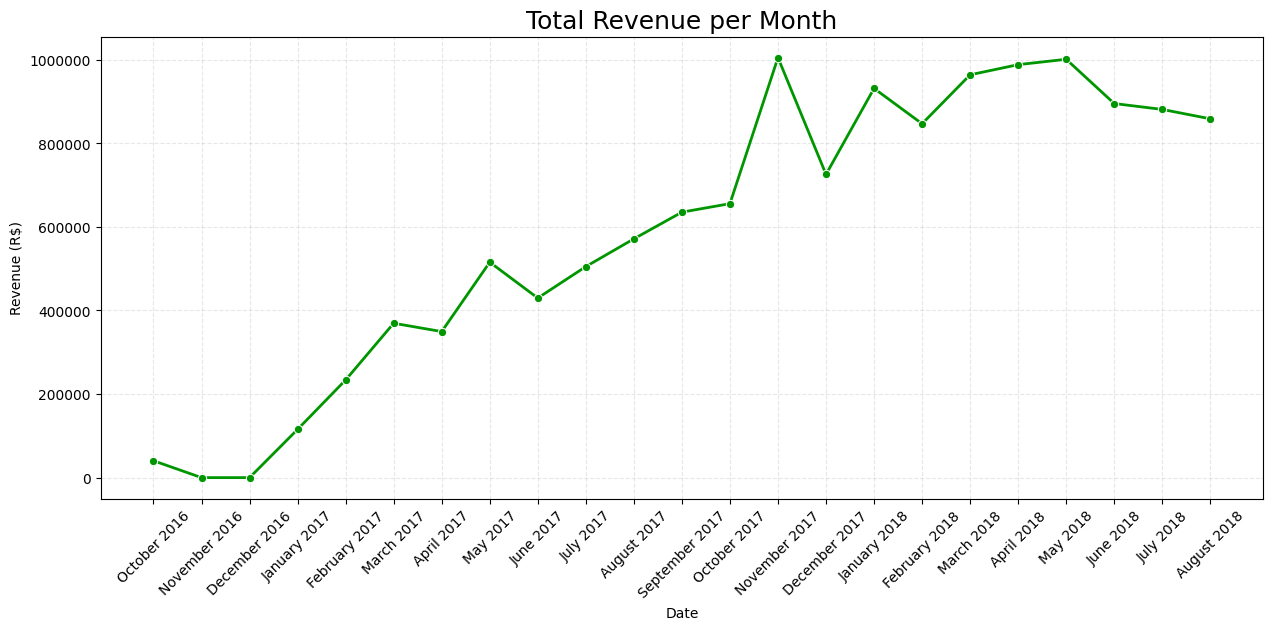

In [127]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=monthly_order_df,
    x='order_purchase_date',
    y='revenue',
    marker='o',
    linewidth=2,
    color='#009600'
)

plt.title('Total Revenue per Month', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Revenue (R$)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
plt.show()

- penurunan jumlah order pada bulan Desember 2017, dan Februari 2018 cukup berpengaruh terhadap pendapatan revenue perusahaan. Data ini dapat menjadi acuan untuk menggali informasi yang lebih banyak mengapa terjadi penurunan jumlah order dan sehingga berdampak pada pendapatan revenue perusahaan pada bulan tersebut.

### 2. Produk apa yang paling banyak dan paling sedikit terjual?

In [128]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
30626,457dbdc9e1ced1274472af8b6fd00be8,1,750dcfda0a9788bba89c94bb82a322db,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-01-17,23.99,16.60
45767,67ec1ff2fc90decdce72e2299a384ee1,1,bb7181410b4e02f93f3697f765db53c7,855668e0971d4dfd7bef1b6a4133b41b,2017-10-23,109.99,57.44
14487,20f7bd9604c674a8a5fb0e8673c5862d,1,6e3e56ba6f1c01a2dfd039f63cb03585,c8b0e2b0a7095e5d8219575d5e7e1181,2018-06-19,94.99,21.97
46653,6a0bbf8742492e0b34832f585d27b875,1,30469bb5ea377eae7121981e2f0778e4,80e6699fe29150b372a0c8a1ebf7dcc8,2017-06-08,113.00,28.15
34939,4f1792824612bbcd94a21516822b86c6,1,eb2b562ff5f5dd3af46e13264146f0c0,004c9cd9d87a3c30c522c48c4fc07416,2017-06-30,189.99,16.96


In [129]:
sum_order_items_df = all_data.groupby('product_category_name_english').order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df

,product_category_name_english,order_item_id
0,bed_bath_table,14336.0
1,furniture_decor,11724.0
2,health_beauty,11106.0
3,sports_leisure,9998.0
4,computers_accessories,9979.0
...,...,...
66,arts_and_craftmanship,26.0
67,la_cuisine,17.0
68,cds_dvds_musicals,16.0
69,fashion_childrens_clothes,7.0


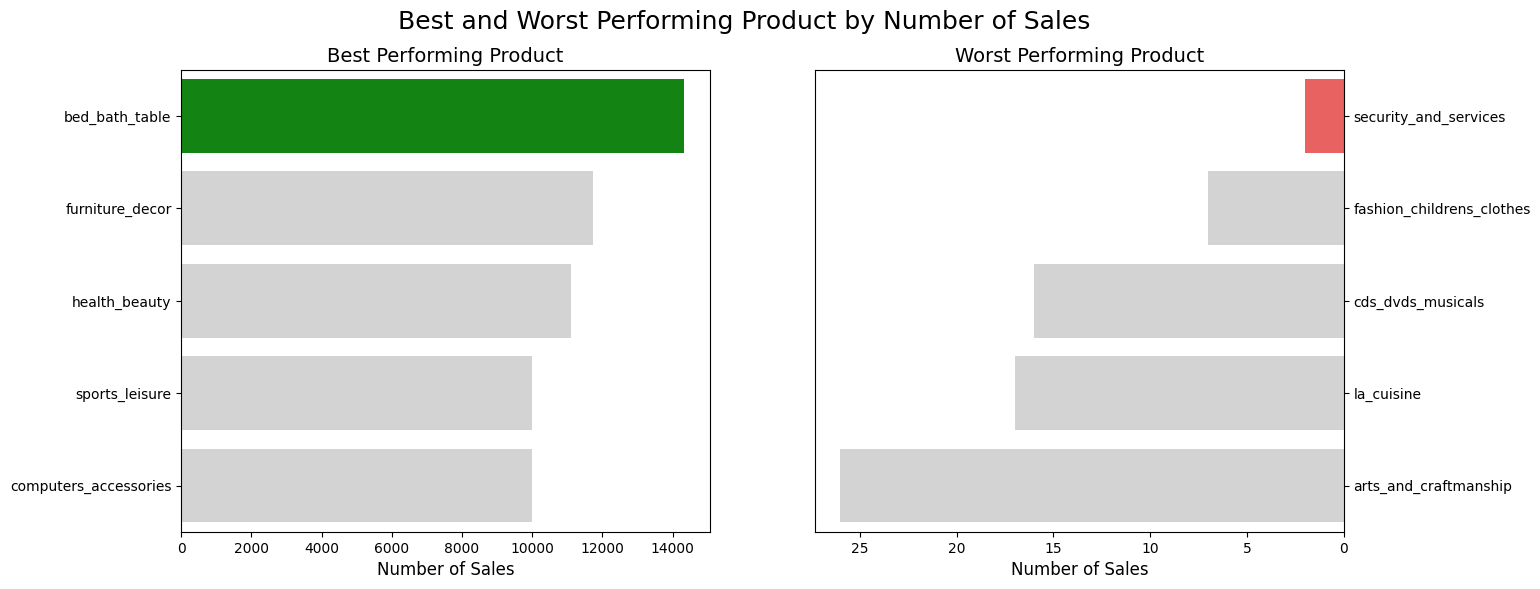

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Sort data
top_products = sum_order_items_df.sort_values(by='order_item_id', ascending=False).head()
worst_products = sum_order_items_df.sort_values(by='order_item_id', ascending=True).head()

# Highlight color
colors_top = ['#009600'] + ['#D3D3D3'] * 4
colors_worst = ['#FF4C4C'] + ['#D3D3D3'] * 4

# Plot Best
sns.barplot(
    data=top_products, 
    x='order_item_id', 
    y='product_category_name_english', 
    hue='product_category_name_english',
    palette=colors_top,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel('Number of Sales', fontsize=12)
ax[0].set_title('Best Performing Product', fontsize=14)

# Plot Worst
sns.barplot(
    data=worst_products, 
    x='order_item_id', 
    y='product_category_name_english', 
    hue='product_category_name_english',
    palette=colors_worst,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel('Number of Sales', fontsize=12)
ax[1].set_title('Worst Performing Product', fontsize=14)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=18)
plt.show()

- berdasarkan diagram diatas produk dengan kategori **bed_bath_table** merupakan kategori produk yang dengan penjualan paling banyak. Lalu produk dengan kategori **security_and_services** merupakan kategori produk dengan penjualan paling sedikit.

### 3. Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir? 

In [131]:
order_pay_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
72060,641936471bfc717987f997bfed150bd6,1,credit_card,1,20.79
16164,22deced3dedb44ec0bb55c504cc4f062,1,credit_card,5,1013.81
30415,ffa378a0d8e871367fbe51bdd9e12a1f,1,credit_card,2,58.80
6092,a17cc4f476cd389757e6a9f3369d84d3,1,credit_card,10,709.58
6996,6fa44c0aa6e74a2ded90c2657778e81d,1,boleto,1,23.10


In [132]:
customers_spend_df = all_data.resample(rule='ME', on='order_purchase_date').agg({
    'payment_value': 'sum'
})
customers_spend_df.index = customers_spend_df.index.strftime('%B %Y')
customers_spend_df = customers_spend_df.round().reset_index()
customers_spend_df.rename(columns={
    'payment_value': 'total_spend'
}, inplace=True)
customers_spend_df

,order_purchase_date,total_spend
0,October 2016,59639.0
1,November 2016,0.0
2,December 2016,20.0
3,January 2017,171518.0
4,February 2017,312798.0
5,March 2017,490523.0
6,April 2017,441119.0
7,May 2017,686168.0
8,June 2017,570380.0
9,July 2017,698065.0


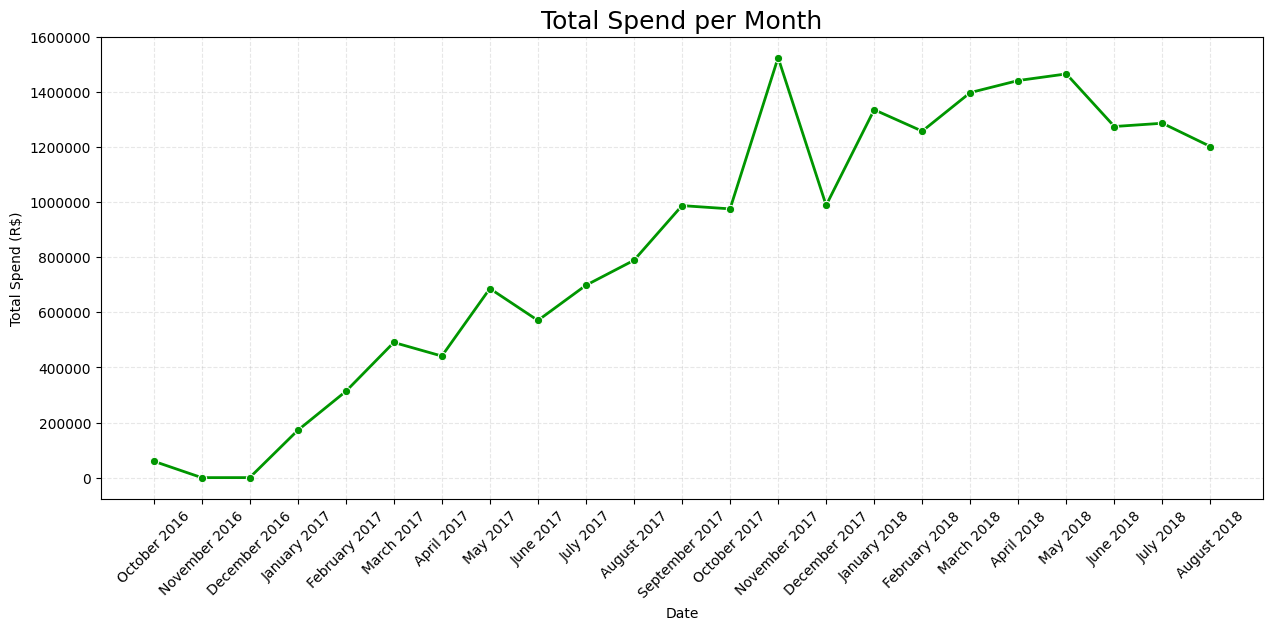

In [133]:
plt.figure(figsize=(15, 6))
sns.lineplot(
    data=customers_spend_df,
    x='order_purchase_date',
    y='total_spend',
    marker='o',
    linewidth=2,
    color='#009600'
)

plt.title('Total Spend per Month', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Total Spend (R$)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))
plt.show()

- Grafik menunjukkan pada bulan November 2017 customer menghabiskan uang paling tinggi. Lalu pada bulan Desember 2017 terjadi penurunan yang signifikan dan kembali stabil pada bulan Januari 2018, hal ini selaras dengan analisis sebelumnya dimana pada bulan Desember tersebut terjadi penurunan jumlah order dan revenue yang dapat dihasilkan perusahaan.

### 4. Produk apa yang memiliki review score tertinggi?

In [134]:
order_rev_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_date
17658,048d554c8d92d5441b993828e2e06b7a,4982e9a98a9e8a3c5bba953450fbf51c,2,No comment,No comment,2018-02-27,2018-02-28
64795,be2d9f27e41954d9ee15e2ebfb3b103f,72661cd9e4da775b13011b9afff1969e,5,No comment,No comment,2018-02-07,2018-02-14
33792,8922472ab9e2d3932f0720724d22a6cd,0224d4ce99f4262f9554d248dfad743c,3,No comment,No comment,2018-03-22,2018-03-25
84773,7c77b4bff0f45c3544329ad34f4c2a04,9da95e5b2fd14284851567baca5a43f5,4,No comment,"Veio certinho e não demorou, só a latinha que ...",2018-04-14,2018-04-16
16814,2a8c0048177758d873c0f5f43f757192,1d6632a2caaca23824c538190fe607c9,5,No comment,baratheon melhor shop de compras,2017-05-22,2017-05-22


In [135]:
customer_review_df = all_data.groupby(by='product_category_name_english').agg({
    'review_score': 'mean'
}).reset_index().sort_values(by='review_score', ascending=False)
customer_review_df.review_score = round(customer_review_df.review_score, 1)
customer_review_df.head()

,product_category_name_english,review_score
29,fashion_childrens_clothes,5.0
11,cds_dvds_musicals,4.6
9,books_imported,4.5
8,books_general_interest,4.5
64,small_appliances_home_oven_and_coffee,4.5


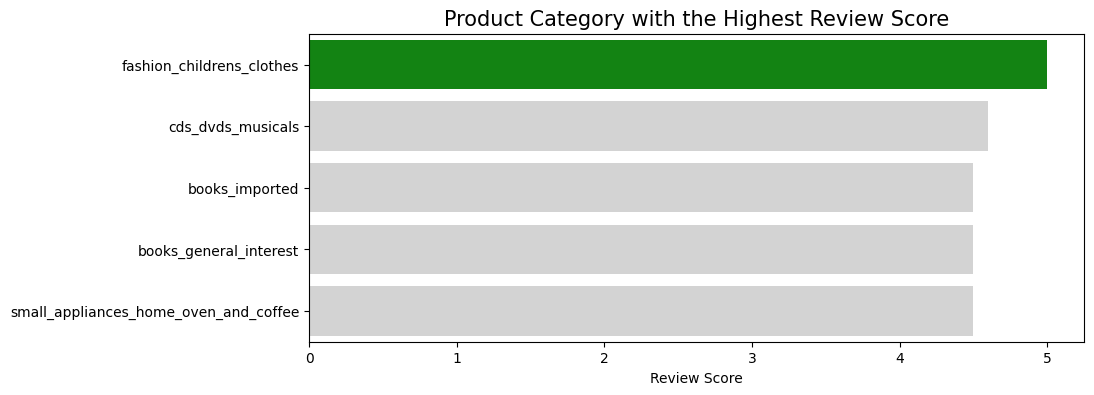

In [136]:
plt.figure(figsize=(10, 4))
sns.barplot(
    data=customer_review_df.head(), 
    x='review_score',
    y='product_category_name_english',
    hue='product_category_name_english',
    palette=['#009600'] + ['#D3D3D3'] * 4
)

plt.title('Product Category with the Highest Review Score', fontsize=15)
plt.ylabel(None)
plt.xlabel('Review Score')
plt.show()

- Terlihat pada diagram bahwa produk dengan kategori **fashion_childrens_clothes** memiliki review score paling tinggi, hal ini menandakan bahwa customer puas dengan kategori produk ini

### 5. Bagaimana demografi dari customer?

#### Berdasarkan payment_type

In [137]:
all_data.payment_type.value_counts()

payment_type
credit_card    83226
boleto         21933
voucher         6003
debit_card      1618
Name: count, dtype: int64

In [138]:
by_payment_type_df = all_data.groupby(by='payment_type').customer_id.nunique().reset_index()
by_payment_type_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
by_payment_type_df = by_payment_type_df.sort_values(by='customer_count', ascending=False)
by_payment_type_df

,payment_type,customer_count
1,credit_card,72520
0,boleto,18730
3,voucher,3587
2,debit_card,1445


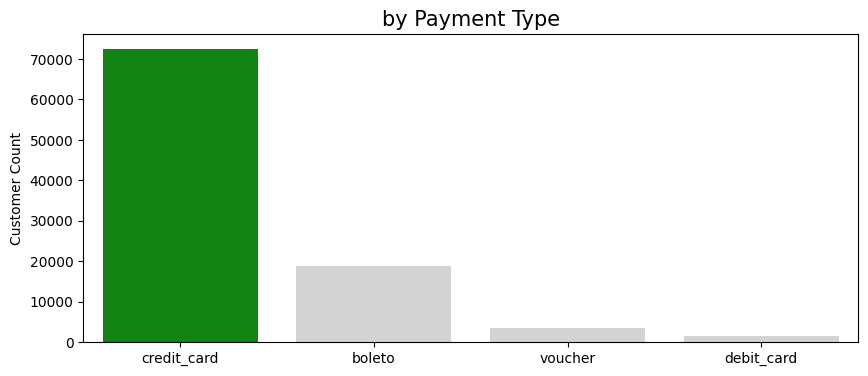

In [139]:
plt.subplots(figsize=(10, 4))
sns.barplot(
    data=by_payment_type_df,
    x='payment_type', 
    y='customer_count',
    hue='payment_type',
    palette=['#009600'] + ['#D3D3D3'] * 3
)

plt.title('by Payment Type', fontsize=15)
plt.ylabel('Customer Count')
plt.xlabel(None)
plt.show()

- customer mayoritas menggunakan tipe pembayaran **credit_card**

#### Berdasrakan customer_city

In [140]:
bycity_df = all_data.groupby(by='customer_city').customer_id.nunique().reset_index()
bycity_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bycity_df = bycity_df.sort_values(by='customer_count', ascending=False)
bycity_df

,customer_city,customer_count
3551,sao paulo,14578
3116,rio de janeiro,6417
448,belo horizonte,2625
552,brasilia,2032
1132,curitiba,1461
...,...,...
17,acari,1
22,acucena,1
2253,matriz de camaragibe,1
2259,mauriti,1


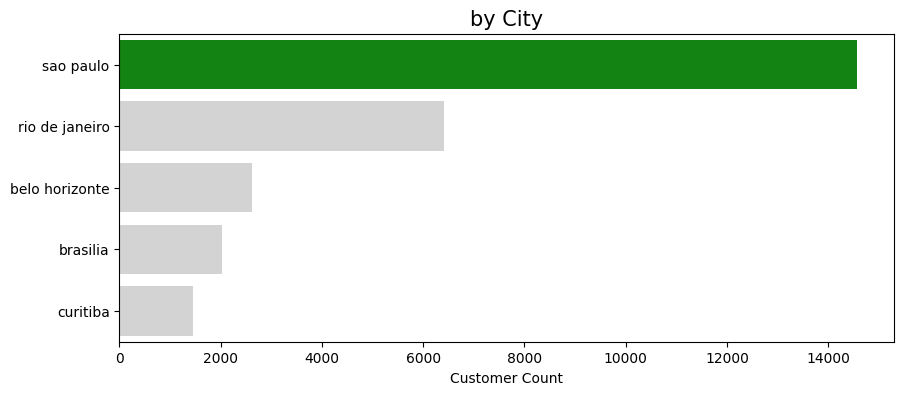

In [141]:
top_cities = bycity_df.sort_values(by='customer_count', ascending=False).head()

plt.subplots(figsize=(10, 4))
sns.barplot(
    data=top_cities,
    x='customer_count', 
    y='customer_city',
    hue='customer_city',
    palette=['#009600'] + ['#D3D3D3'] * 4
)

plt.title('by City', fontsize=15)
plt.ylabel(None)
plt.xlabel('Customer Count')
plt.show()

- customer mayoritas berasal dari kota **sao paulo** dan **rio de janeiro**

#### Berdasarkan customer_state

In [142]:
bystate_df = all_data.groupby(by='customer_state').customer_id.nunique().reset_index()
bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)
bystate_df

,customer_state,customer_count
25,SP,39458
18,RJ,12014
10,MG,11099
22,RS,5239
17,PR,4825
23,SC,3463
4,BA,3187
6,DF,2040
7,ES,1952
8,GO,1900


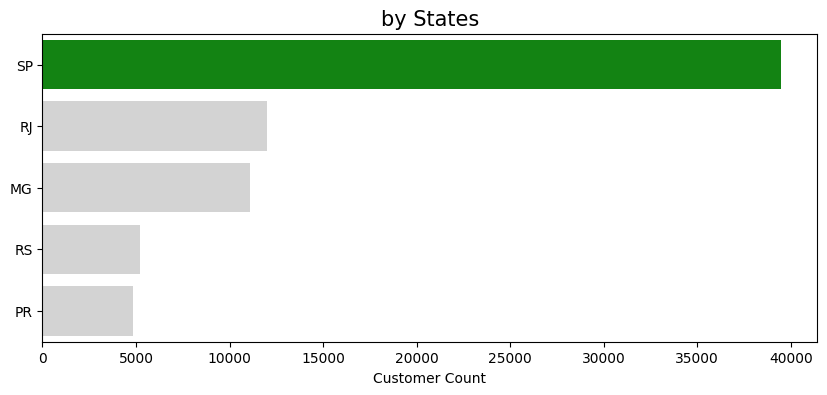

In [143]:
top_states = bystate_df.sort_values(by='customer_count', ascending=False).head()

plt.subplots(figsize=(10, 4))
sns.barplot(
    data=top_states,
    x='customer_count', 
    y='customer_state',
    hue='customer_state',
    palette=['#009600'] + ['#D3D3D3'] * 4
)

plt.title('by States', fontsize=15)
plt.ylabel(None)
plt.xlabel('Customer Count')
plt.show()

- mayoritas customer berasal dari state **SP** kemudian disusul oleh state **RJ** dan **MG**

### 6. Darimana rata-rata customer berasal?

Geospatial Analysis using GeoPandas

In [144]:
custgeo_df.sample()

,customer_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,coords
93987,45baf4584b09b21ed234180c74e938b0,4830,sao paulo,SP,-23.731774,-46.701265,POINT (-23.73177 -46.70126)


In [145]:
map_df = custgeo_df.groupby(['customer_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng']).agg({
        'customer_id': 'count'
    }).sort_values(by='customer_id', ascending=False).reset_index()

map_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)

map_df

,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,customer_count
0,22790,rio de janeiro,RJ,-23.012987,-43.465520,142
1,24220,niteroi,RJ,-22.903245,-43.107024,124
2,22793,rio de janeiro,RJ,-23.000619,-43.404718,121
3,24230,niteroi,RJ,-22.878637,-43.086096,117
4,22775,rio de janeiro,RJ,-22.969148,-43.383065,110
...,...,...,...,...,...,...
14872,12441,pindamonhangaba,SP,-22.924584,-45.370284,1
14873,12442,pindamonhangaba,SP,-22.938527,-45.382310,1
14874,12446,pindamonhangaba,SP,-22.886176,-45.367575,1
14875,1108,sao paulo,SP,-23.527232,-46.630354,1


- Terlihat wilayah kota **rio de janeiro** dengan zip code **22790** terdapat jumlah customer paling banyak yaitu 142.

In [146]:
# map_df.to_csv('map_data.csv', index=False)

In [147]:
def create_density_map(dataframe):    
    # Create density map figure
    fig = px.density_map(
        dataframe,
        lat='geolocation_lat',
        lon='geolocation_lng',
        z='customer_count',
        radius=15,
        center=dict(lat=-14.2350, lon=-51.9253),
        zoom=3.4,
        color_continuous_scale='Greens',
        map_style='carto-voyager',
        template='plotly_white'
    )
    # Update figure layout
    fig.update_layout(
        width=600,
        height=700,
        margin={'r':1, 't':1, 'l':1, 'b':1},
        paper_bgcolor='#009600'
    )
    # Update colorbar location and orientation
    fig.update_coloraxes(
        showscale=True,
        colorbar=dict(
            len=0.4,
            yanchor='top',
            y=1,
            xanchor='center',
            orientation='h',
            thickness=10,
            title='Customer Density Map',
            title_side='top',
            title_font_size=16,
            title_font_weight=600
        )
    )
    return fig

In [148]:
create_density_map(map_df)

- Terlihat rata-rata customer berasal dari wilayah selatan dan pesisir negara brazil.

## Conclusion

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

    > Berdasarkan hasil analisa performa penjualan memiliki jumlah order paling banyak terjadi pada bulan November 2017 dan terjadi penurunan jumlah order yang cukup signifikan pada bulan Desember 2017 tetapi kembali stabil pada bulan Januari 2018. Hal ini bisa saja terjadi karena banyak faktor seperti kompetitor, perubahan market, strategi penjualan dan iklan, dll.

    > Berdasarkan hasil analisa revenue perusahaan paling tinggi terjadi pada bulan November 2017 lalu terjadi penurunan performa penjualan pada bulan Desember 2017, dan bulan Februari 2018 yang cukup berdampak terhadap penurunan revenue perusahaan. Data ini dapat menjadi acuan untuk menggali informasi yang lebih banyak mengapa terjadi penurunan jumlah order dan sehingga berdampak pada pendapatan revenue perusahaan pada bulan tersebut.

2. Produk apa yang paling banyak dan paling sedikit terjual?

    > Berdasarkan hasil analisa produk dengan kategori bed_bath_table merupakan kategori produk dengan penjualan paling banyak dengan jumlah order mencapai 14336. Kemudian produk dengan kategori security_and_services merupakan kategori produk dengan penjualan paling sedikit yang hanya mendapatkan 2 order saja. Informasi ini dapat digunakan untuk meningkatkan strategi penjualan dengan menargetkan kepada customer dengan preferensi yang sesuai.
3. Berapa banyak uang yang dihabiskan customer dalam beberapa bulan terakhir? 

    > Berdasarkan hasil analisa pada bulan November 2017 adalah titik tertinggi customer menghabiskan uang di platform. Lalu pada bulan Desember 2017 terjadi penurunan yang signifikan dan kembali stabil pada bulan Januari 2018, hal ini selaras dengan analisis sebelumnya dimana pada bulan Desember tersebut terjadi penurunan jumlah order dan revenue yang dapat dihasilkan perusahaan.
4. Produk apa yang memiliki review score tertinggi?

    > Berdasarkan hasil analisa produk dengan kategori fashion_childrens_clothes adalah kategori dengan review score paling tinggi yaitu mendapat rating 5.0, kemudian disusul kategori cds_dvds_musicals dengan rating 4.6, book_imported dengan rating 4.5, book_general_interest dengan 4.5, lalu small_appliances_home_oven_and_coffee dengan rating 4.5. Hal ini menandakan bahwa customer puas dengan kategori pada produk-produk ini.
5. Bagaimana demografi dari customer?

    > Hasil analisa berdasarkan tipe pembayaran menunjukkan bahwa mayoritas customer menggunakan tipe pembayaran dengan kartu kredit kemudian disusul dengan boleto, voucher, dan debit card.
    > Hasil analisa berdasarkan kota asal dari customer menunjukkan bahwa mayoritas customer berasal dari kota sao paulo lalu disusul rio de janeiro, belo horizonte, dll.
    > Hasil analisa berdasarkan customer state menunjukkan bahwa mayoritas customer berasal dari state SP kemudian disusul RJ, MG, dll.
6. Darimana rata-rata customer berasal?

    > Berdasarkan analisa dari density map menunjukkan bahwa rata-rata customer berasal dari wilayah selatan dan pesisir dari negara brazil. Informasi ini dapat digunakan untuk meningkatkan efisiensi iklan dengan target yang lebih terukur berdasarkan wilayah dan preferensi customer yang lebih terarah.